# Load Layer outputs

In [4]:
nn = 'LNN'

import pickle
with open('results/' +nn +'_layer_outputs.dat','rb') as f:
    layer_outs,layer_outs_test= pickle.load(f)
f.close()

# Load recording and test data

In [5]:
import numpy as np
from keras.datasets import mnist
from scipy.misc import imresize

(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()

(ntrain, xdim, ydim) = Xtrain.shape
ntest = Xtest.shape[0]

# Recording data
X_pr = Xtrain[30000:60000, :, :]
Y_pr = Ytrain[30000:60000]

# downsample
factor = 0.25

Xtest_down = np.ones((Xtest.shape[0], int(xdim*factor), int(ydim*factor)))
for i in range(Xtest.shape[0]):
    Xtest_down[i,:,:] = imresize(Xtest[i,:,:], factor)

X_pr_down = np.ones((X_pr.shape[0], int(xdim*factor), int(ydim*factor)))
for i in range(X_pr.shape[0]):
    X_pr_down[i,:,:] = imresize(X_pr[i,:,:], factor)
    
# VECTORIZE IMAGES
Xtest_down = Xtest_down.reshape(ntest, int(xdim*factor)**2).astype('float32') / 255
X_pr_down = X_pr_down.reshape(X_pr_down.shape[0], int(xdim*factor)**2).astype('float32') / 255

Using TensorFlow backend.


# Run Multiple Regressions

In [19]:
from copy import copy, deepcopy
from RE_PartialRecData2 import RE_PartialRecData2
from sklearn import preprocessing, linear_model
import pickle


# how many recordings?
nRecordings = 10
# how many neurons from the firs hidden layer?
subnetSize = [2**x for x in range(8)]
#subnetSize =[1, 2,8, 64]
nSubnetSize = len(subnetSize)
# which layers?
iLayer=0
# how many samples per recording?
nSamples = np.divide(int(X_pr_down.shape[0]/nRecordings),subnetSize)*100
# how many iterations
nIterations = 1

# baseline prediction error
#bl = np.std(layer_outs_test[oLayer]-np.mean(layer_outs_test[oLayer]));

oLayer = len(layer_outs)-1  # index of output layer
nOutNeurons = layer_outs[oLayer].shape[1]
rmses = np.zeros([nIterations, nOutNeurons, nSubnetSize])

for iLayer in range(len(layer_outs)-1):
    for ss in range(nSubnetSize):
        #r_coefs =np.zeros((nIterations, 10, 128))
        #nLayerNeurons = [subnetSize[ss], 0, 0, 0, 10]
        nLayerNeurons = subnetSize[ss]
        print(subnetSize[ss])
        for it in range(nIterations):
            # copy data - is this necessary?
            layer_outputs = deepcopy(layer_outs)
            # subsample
            X_subsample, Y_subsample = RE_PartialRecData2(layer_outputs[iLayer], layer_outputs[oLayer], \
                                                          nLayerNeurons, nRecordings, nSamples[ss])
            print('# nan values: ', np.divide(np.count_nonzero(np.isnan(X_subsample)), \
                                              float(np.count_nonzero(np.ones(X_subsample.shape)))))
            # impute X_subsample with mean value, apply imputation to test set
#             imp =preprocessing.Imputer(missing_values='NaN', strategy='mean')
#             impf =imp.fit(X_subsample)
#             X_new = impf.transform(X_subsample)
#             (rem_cols, ) = np.where(np.sum(X_new, axis=0)==0)
#             if rem_cols.shape[0]>0:
#                 print('Removing cols #', rem_cols)
#             X_test_new= impf.transform(layer_outs_test[iLayer])
#             # fit regression model
#             #regr = linear_model.Lasso(0.01)
#             regr =linear_model.LinearRegression()
#             regr.fit(X_new, Y_subsample)
#             #r_coefs[it,:, ]=regr.coef_
#             # calculate rmse
#             rmses[it,:,ss] = np.sqrt(np.mean((regr.predict(X_test_new) - layer_outs_test[oLayer])**2, axis=0))

#             print ('predicting, mean RMSEs=%f' %np.mean(rmses[it, :, ss]))

#     fName = 'LR_RMSES_Layer'+str(iLayer) + 'nRec' + str(nRecordings) + nn + '.dat'
#     # save the rmse's
#     with open(fName,'wb') as f:
#         pickle.dump(rmses, f)
#     f.close()

1
('# nan values: ', 0.0)
2
('# nan values: ', 0.0)
4
('# nan values: ', 0.0)
8
('# nan values: ', 0.0)
16
('# nan values: ', 0.0)
32
('# nan values: ', 0.0)
64
('# nan values: ', 0.0)
128
('# nan values: ', 0.0)
1
('# nan values: ', 0.0)
2
('# nan values: ', 0.0)
4
('# nan values: ', 0.0)
8
('# nan values: ', 0.0)
16
('# nan values: ', 0.0)
32
('# nan values: ', 0.0)
64
('# nan values: ', 0.0)
128
('# nan values: ', 0.0)
1
('# nan values: ', 0.0)
2
('# nan values: ', 0.0)
4
('# nan values: ', 0.0)
8
('# nan values: ', 0.0)
16
('# nan values: ', 0.0)
32
('# nan values: ', 0.0)
64
('# nan values: ', 0.0)
128
('# nan values: ', 0.0)
1
('# nan values: ', 0.0)
2
('# nan values: ', 0.0)
4
('# nan values: ', 0.0)
8
('# nan values: ', 0.0)
16
('# nan values: ', 0.0)
32
('# nan values: ', 0.0)
64
('# nan values: ', 0.0)
128
('# nan values: ', 0.0)


In [13]:
np.divide(np.count_nonzero(np.isnan(X_subsample)), \
                                              float(np.count_nonzero(np.ones(X_subsample.shape))))

0.9921875

(0, 0.35)

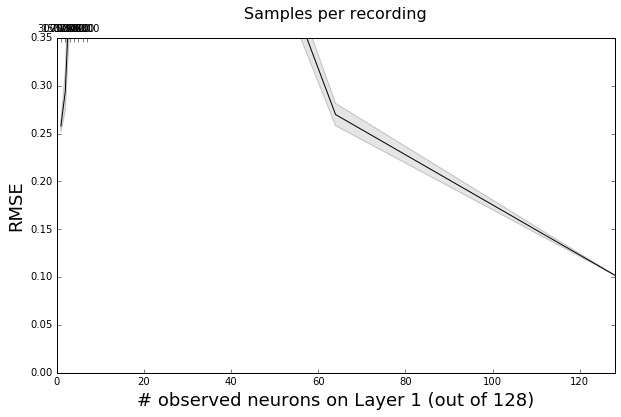

In [6]:

import matplotlib.pyplot as pl
%matplotlib inline
import numpy as np

fig=pl.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.set_xlim([0, 128])
ax2 = ax1.twiny()

x = subnetSize;
y = np.mean(np.median(rmses, axis=1), axis=0)
error = np.std(np.mean(rmses, axis=1), axis=0)
bl = np.std(layer_outs_test[oLayer]-np.mean(layer_outs_test[oLayer]));

pl.plot(x, y, 'k-')
# horiz_line_data = np.array([bl for i in xrange(len(x))])
# pl.plot(x, horiz_line_data, 'k--') 
pl.fill_between(x, y-error, y+error, alpha=0.2, facecolor='#808080')

ax1.set_xlabel('# observed neurons on Layer 1 (out of 128)', fontsize=18)
ax2.set_xlabel('Samples per recording',  fontsize=16)

new_tick_locations =range(len(nSamples))
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(nSamples)


# ax2.set_xticks(nSamples)
# ax2.set_xticklabels(nSamples[range(0, 5, 20)])
ax1.set_ylabel('RMSE', fontsize=18)
ax1.set_ylim([0, .35])

#pl.text(110,bl+0.005, 'baseline')
